This notebook will be used to import the results from the ZooScatR model simulations.

## Import important stuff

In [166]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
import array as arr
from scipy.stats import kde
%matplotlib inline

In [11]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True);

# Read data
Read in the data from the simulations run in R with ZooScatR. A script including the simulations can be found in sim_Muriel.Rmd.

In [39]:
simulations = pd.read_feather('../ZooScatStuff/Zoopmix_thesis_fullbandwidth.feather')
# Add a row for sigma_bs
simulations['sigbs'] = 10**(simulations.TS/10)


# select first model run
freq_dwba = simulations.freq.unique()*1000

In [40]:
cod_scat = pd.read_csv('C:/Users/mbd/phd/ViscousElasticModel/ve_results/ve_cod_28092023.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
cod_sigbs_ve = 10**(cod_scat['TS']/10)
freqs_cod = cod_scat['frequency']

In [41]:
ptero_scat = pd.read_csv('C:/Users/mbd/phd/ViscousElasticModel/ve_results/ve_limacina_28092023.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
ptero_sigbs_ve = 10**(ptero_scat['TS']/10)
freqs_ptero = ptero_scat['frequency']

### Plot TS backscatter data

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


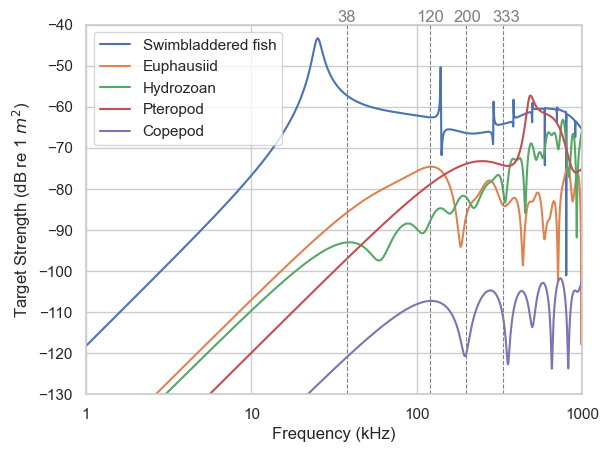

In [172]:
fig, ax = plt.subplots(1,1)
plt.plot(freqs_cod, cod_scat['TS'], label='Swimbladdered fish')
plt.plot(freq_dwba, simulations.TS[simulations['spec']=='Euphausiids'],  label='Euphausiid')
plt.plot(freq_dwba, simulations.TS[simulations['spec']=='Hydrozoans'],  label='Hydrozoan')
plt.plot(freqs_ptero, ptero_scat['TS'], label='Pteropod')
plt.plot(freq_dwba, simulations.TS[simulations['spec']=='Copepods'], label='Copepod')

ax.set_xscale('log')
plt.xlim([1000,1000000])
plt.ylim([-130,-40])
plt.legend()
plt.ylabel('Target Strength (dB re 1 $m^2$)')
plt.xlabel('Frequency (kHz)')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '1'
labels[1] = '10'
labels[2] = '1'
labels[3] = '10'
labels[4] = '100'
labels[5] = '1000'
ax.set_xticklabels(labels)

ax.axvline(x=38000, ls='--', lw=0.8, color='grey')
ax.axvline(x=120000, ls='--', lw=0.8, color='grey')
ax.axvline(x=200000, ls='--', lw=0.8, color='grey')
ax.axvline(x=333000, ls='--', lw=0.8, color='grey')

ax.annotate("38", xy=(32000,-40), xytext=(2,2), textcoords="offset points", 
                rotation_mode='anchor', rotation=0, color='grey')
ax.annotate("120", xy=(95000,-40), xytext=(2,2), textcoords="offset points", 
                rotation_mode='anchor', rotation=0, color='grey')
ax.annotate("200", xy=(160000,-40), xytext=(2,2), textcoords="offset points", 
                rotation_mode='anchor', rotation=0, color='grey')
ax.annotate("333", xy=(275000,-40), xytext=(2,2), textcoords="offset points", 
                rotation_mode='anchor', rotation=0, color='grey')


ax.set_rasterized(True)
fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/Thesis/Figures/Figure3_TS.eps', format='eps', dpi = 300, facecolor='w', bbox_inches='tight')

In [86]:
labels

['1', '10', '100', '', '', '', '']